<a href="https://colab.research.google.com/github/dongzooo/BinanceAPI-FutureTrading-Order-book/blob/main/2%EB%B2%88_iris_%EC%A0%95%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8_(Fully_Connected_Layer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Category 2 - Iris 꽃 분류

* Fully Connected Layer (Dense)를 활용한 분류 모델 (Classification)
* tensorflow-datasets 를 활용한 데이터 전처리

## 확인

1. GPU 옵션 켜져 있는지 확인할 것!!! (수정 - 노트설정 - 하드웨어설정 (GPU))

## 순서

1. **import**: 필요한 모듈 import
2. **전처리**: 학습에 필요한 데이터 전처리를 수행합니다.
3. **모델링(model)**: 모델을 정의합니다.
4. **컴파일(compile)**: 모델을 생성합니다.
5. **학습 (fit)**: 모델을 학습시킵니다.

## 문제

For this task you will train a classifier for Iris flowers using the Iris dataset

The final layer in your neural network should look like: tf.keras.layers.

Dense(3, activation=tf.nn.softmax)

The input layer will expect data in the shape (4,)

We've given you some starter code for preprocessing the data

You'll need to implement the preprocess function for data.map


이 작업에서는 Iris 데이터 세트를 사용하여 Iris 꽃 분류기를 훈련시킵니다.

신경망의 마지막 계층은 tf.keras.layers와 같아야합니다.

**Dense(3, activation='softmax')**

입력 레이어는 모양의 데이터를 기대합니다 (4,)

데이터 전처리를위한 스타터 코드를 제공했습니다

data.map에 대한 전처리 기능을 구현해야합니다.

In [ ]:
from IPython.display import Image

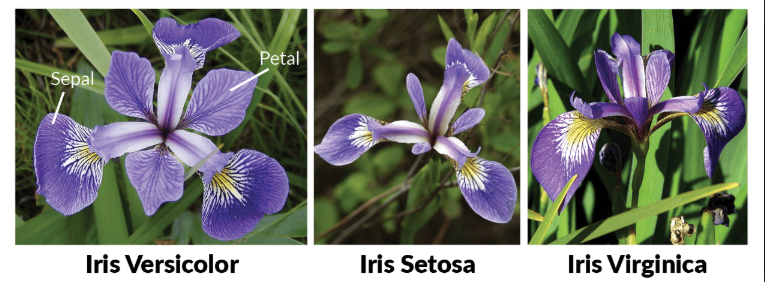

In [ ]:
Image('https://user-images.githubusercontent.com/15958325/56006707-f69f3680-5d10-11e9-8609-25ba5034607e.png')

## import 하기

필요한 모듈을 import 합니다.

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

## Load dataset

**tensorflow-datasets**를 활용합니다.

* [Iris 데이터셋 문서 보기](https://www.tensorflow.org/datasets/catalog/iris?hl=ko)

* [tensorflow-datasets 다루기](https://www.tensorflow.org/datasets/splits?hl=ko)

**시험에서 주어지는 데이터셋 로드 형태**

* 예전 방식이므로 아래처러 주어지는 코드를 과감히 삭제 후, 아래 제공되는 방식으로 변경합니다.

In [ ]:
#예전방식
#data = tfds.load("iris", split=tfds.Split.TRAIN.subsplit(tfds.percent[:80]))

`train_dataset`와 `valid_dataset`을 만들고 **80% : 20%로 분할**합니다.

In [ ]:
train_dataset = tfds.load('iris', split='train[:80%]')
valid_dataset = tfds.load('iris', split='train[80%:]')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/iris/2.0.0.incomplete8LV8UN/iris-train.tfrecord*...:   0%|          | 0/150 [0…

Dataset iris downloaded and prepared to ~/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.


## tensorflow-datasets 다루기

`train_dataset`를 출력해 보면, 디테일한 정보를 나타내지 않습니다.

In [ ]:
train_dataset

<PrefetchDataset element_spec={'features': TensorSpec(shape=(4,), dtype=tf.float32, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

먼저, 시험에서는 다음과 같은 **전처리 요구 조건**이 있습니다.

1. label 값을 **one-hot encoding** 할 것
2. feature (x), label (y)를 분할할 것

**[실습코드]**

In [ ]:
#feature (x), label (y)를 분할
for data in train_dataset.take(5):
  x = data['features']
  y= data['label']
  print(x,y)

tf.Tensor([5.1 3.4 1.5 0.2], shape=(4,), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor([7.7 3.  6.1 2.3], shape=(4,), dtype=float32) tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor([5.7 2.8 4.5 1.3], shape=(4,), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor([6.8 3.2 5.9 2.3], shape=(4,), dtype=float32) tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor([5.2 3.4 1.4 0.2], shape=(4,), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
for data in train_dataset.take(1):
    print(data)

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.1, 3.4, 1.5, 0.2], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>}


In [ ]:
#전처리함수
def preprocess(data):
    # 코드를 입력하세요
    x = data['features']
    y = data['label']
    y = tf.one_hot(y, 3) #분류하는 개수, 꽃 3종류라 3
    return x, y

**batch**란?

1개의 Epoch에서 **여러 개의 샘플을 나누어 학습하는 단위** 입니다.

**예시**

**1,000개의 이미지**를 학습하는 경우.

* **batch_size=10** => (1000개 이미지) / (batch_size=10) = 총 **100개의 batch**
* **batch_size=20** => (1000개 이미지) / (batch_size=20) = 총 **50개의 batch**
* **batch_size=50** => (1000개 이미지) / (batch_size=50) = 총 **20개의 batch**

#### 배치의 개수만큼 Weight업데이트가 발생한다. 배치가 적을수록 빠르지만 정교하게 도달하기 어렵다.하지만 배치가 많으면 정교하지만 잘못된 방향으로 갈 수 있다.

만든 전처리 함수(preprocessing)를 **dataset에 mapping**하고, **batch_size도 지정**합니다.

In [ ]:
batch_size=10

In [ ]:
train_data = train_dataset.map(preprocess).batch(batch_size)

In [ ]:
valid_data = valid_dataset.map(preprocess).batch(batch_size)

## 모델 정의 (Sequential)

이제 Modeling을 할 차례입니다.

`Sequential` 모델 안에서 층을 깊게 쌓아 올려 주면 됩니다.

1. `input_shape`는 Iris 꽃 데이터셋의 X의 feature 갯수가 4개 이므로 **(4, )**로 지정합니다.
2. 깊은 출력층과 더 많은 Layer를 쌓습니다.
3. Dense Layer에 `activation='relu'`를 적용합니다.
4. 분류(Classification)의 마지막 층의 출력 숫자는 분류하고자 하는 클래스 갯수와 **같아야** 합니다.


In [ ]:
model = tf.keras.models.Sequential([
    # input_shape는 X의 feature 갯수가 4개 이므로 (4, )로 지정합니다.
    Dense(512, activation='relu', input_shape=(4,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Classification을 위한 Softmax, 클래스 갯수 = 3개
    Dense(3, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 177,219
Trainable params: 177,219
Non-trai

## 컴파일 (compile)

1. `optimizer`는 가장 최적화가 잘되는 알고리즘인 'adam'을 사용합니다.
2. `loss`설정
  * 출력층 activation이 `sigmoid` 인 경우: `binary_crossentropy`
  * 출력층 activation이 `softmax` 인 경우: 
    * 원핫인코딩(O): `categorical_crossentropy`
    * 원핫인코딩(X): `sparse_categorical_crossentropy`)
3. `metrics`를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있습니다.

전처리 단계에서 **one-hot encoding** 을 해주었습니다. 따라서, `categorical_crossentropy`를 지정해주면 됩니다.

model.compile()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

## ModelCheckpoint: 체크포인트 생성

`val_loss` 기준으로 epoch 마다 최적의 모델을 저장하기 위하여, ModelCheckpoint를 만듭니다.
* `checkpoint_path`는 모델이 저장될 파일 명을 설정합니다.
* `ModelCheckpoint`을 선언하고, 적절한 옵션 값을 지정합니다.

In [ ]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

## 학습 (fit)

1. `validation_data`를 반드시 지정합니다.
2. `epochs`을 적절하게 지정합니다.
3. `callbacks`에 바로 위에서 만든 checkpoint를 지정합니다.

In [ ]:
history = model.fit(train_data,
                    validation_data=(valid_data),
                    epochs=20,
                    callbacks=[checkpoint],
                   )

Epoch 1/20
 1/12 [=>............................] - ETA: 30s - loss: 1.1050 - acc: 0.3000
Epoch 1: val_loss improved from inf to 0.63185, saving model to my_checkpoint.ckpt
12/12 [==============================] - 3s 26ms/step - loss: 0.8897 - acc: 0.6833 - val_loss: 0.6318 - val_acc: 0.8333
Epoch 2/20
 1/12 [=>............................] - ETA: 0s - loss: 0.6138 - acc: 0.8000
Epoch 2: val_loss improved from 0.63185 to 0.38322, saving model to my_checkpoint.ckpt
12/12 [==============================] - 0s 11ms/step - loss: 0.4595 - acc: 0.8500 - val_loss: 0.3832 - val_acc: 0.8333
Epoch 3/20
 1/12 [=>............................] - ETA: 0s - loss: 0.3460 - acc: 0.8000
Epoch 3: val_loss improved from 0.38322 to 0.23455, saving model to my_checkpoint.ckpt
12/12 [==============================] - 0s 9ms/step - loss: 0.2642 - acc: 0.9083 - val_loss: 0.2345 - val_acc: 0.9667
Epoch 4/20
 1/12 [=>............................] - ETA: 0s - loss: 0.1604 - acc: 1.0000
Epoch 4: val_loss did not i

## 학습 완료 후 Load Weights (ModelCheckpoint)

학습이 완료된 후에는 반드시 `load_weights`를 해주어야 합니다.

그렇지 않으면, 열심히 ModelCheckpoint를 만든 의미가 없습니다.

In [ ]:
# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)

In [ ]:
model.save("TF2-iris0_0397.h5")

## 학습 Loss (오차)에 대한 시각화

In [ ]:
import matplotlib.pyplot as plt

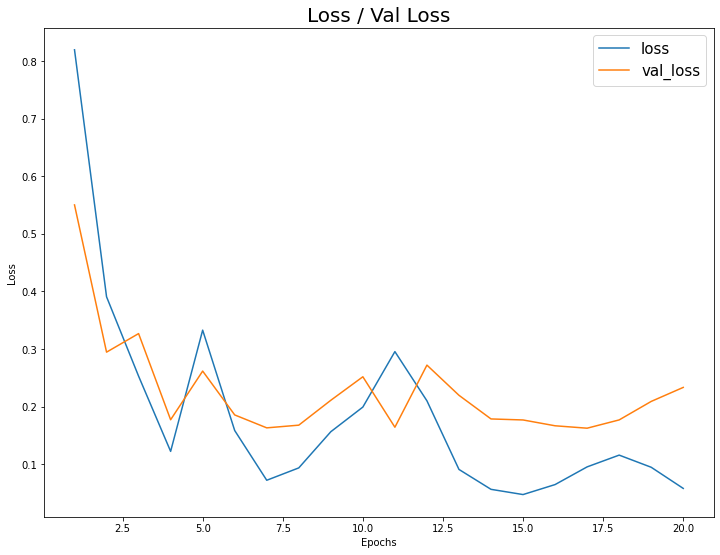

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

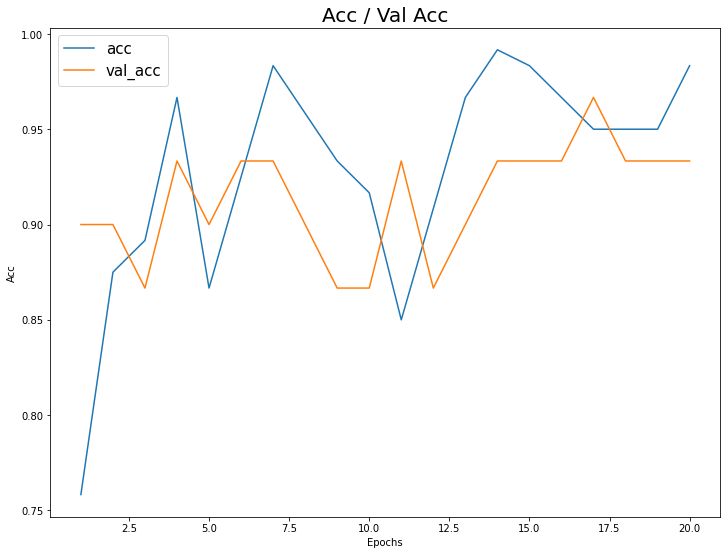

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()